## Exercise 1

### 1.A

#### 1

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pds
from matplotlib import pyplot as plt
from math import *
import scipy

In [ ]:
def pi_target(X, Y, a):
    return np.exp( - X**2/a**2 - Y**2 - (X**2/a**2 - Y**2)**2/4 )

def MH_with_Gibbs_sampler_2d(maxIter, proba, sigma_X, sigma_Y, X0, Y0, a):

    points = []
    points.append([X0,Y0])

    for n in range(1,maxIter):

    B = np.random.binomial(1, proba)

    if B == 0: # update the x axis with a new candidate
        X_candidate = np.random.normal(points[-1][0], sigma_X)
        log_ratio_target = np.log(pi_target(X_candidate, points[-1][1], a)) - np.log(pi_target(points[-1][0], points[-1][1], a))
        u = np.random.uniform()
        if np.log(u) < min(0, log_ratio_target):
            points.append([X_candidate, points[-1][1]])
        else:
            points.append([points[-1][0], points[-1][1]])

    else: # update the y axis with a new candidate
        Y_candidate = np.random.normal(points[-1][1], sigma_Y)
        log_ratio_target = np.log(pi_target(points[-1][0], Y_candidate, a)) - np.log(pi_target(points[-1][0], points[-1][1], a))
        u = np.random.uniform()
        if np.log(u) < min(0, log_ratio_target):
            points.append([points[-1][0], Y_candidate])
        else:
            points.append([points[-1][0], points[-1][1]])

    return points

### 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


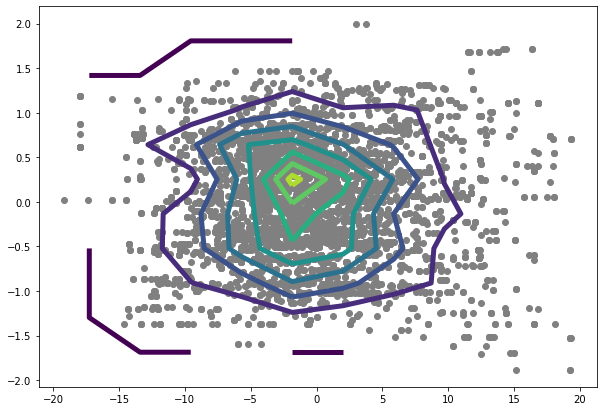

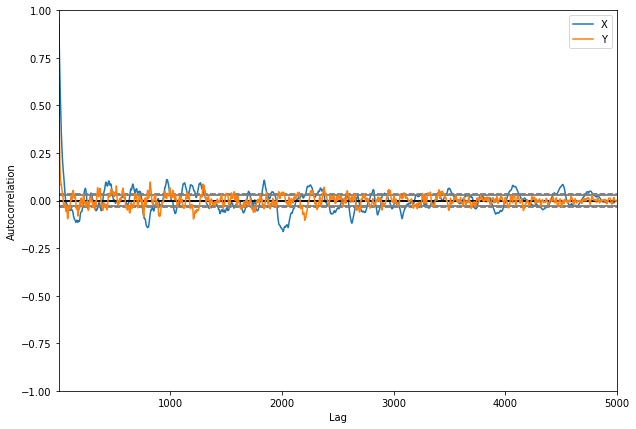

In [ ]:
sampled_points = MH_with_Gibbs_sampler_2d(maxIter = 5000, proba = 0.5, sigma_X = 3, sigma_Y = 3, X0 = 3, Y0 = 2, a = 10)
X = np.array(sampled_points)[:,0]
Y = np.array(sampled_points)[:,1]
plt.figure( figsize=(10,7) )
H, Xedges, Yedges = np.histogram2d(X, Y)
Xbins = Xedges[:-1] + (Xedges[1] - Xedges[0]) / 2
Ybins = Yedges[:-1] + (Yedges[1] - Yedges[0]) / 2
plt.scatter(X, Y, color="gray")
plt.contour(Xbins, Ybins, H.T, linewidths=5)
plt.show()

DF = pds.DataFrame([X,Y]).transpose()
DF.columns = ["X","Y"]
plt.figure( figsize=(10,7) )
pds.plotting.autocorrelation_plot(DF.X, label="X")
pds.plotting.autocorrelation_plot(DF.Y, label="Y")
plt.show()

With the contour plot of the density we can see that our points are centered around the origin. Looking at the autocorrelation functions of the x and y coordinates tells us about the relationship of the sampled points through time. The x coordinates take more time to "stabilize" than the y coordinates.

#### 3

To improve the algorithm we could increase the capacity of the x coordinate to explore. To do so we might increase the variance of the x candidate sampled or we might use an adaptive version as we will see below.

### 1.B

#### 1

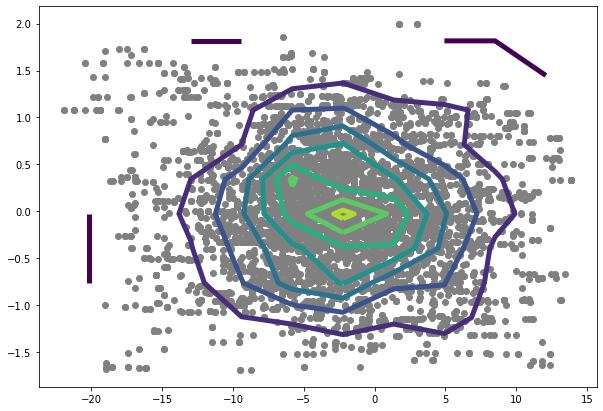

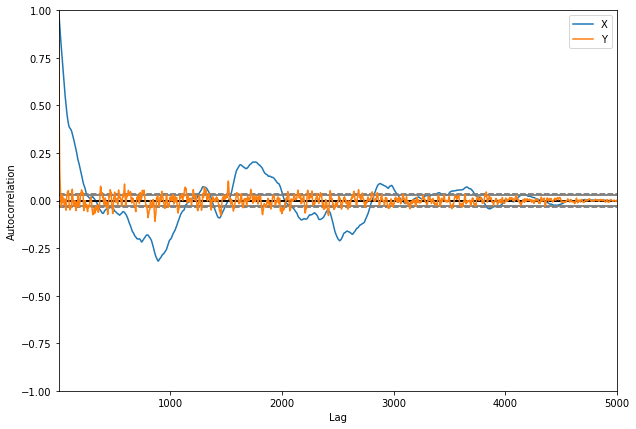

In [ ]:
def adaptive_MH_with_Gibbs_sampler_2d(maxIter, proba, point0, a):

    points = []
    points.append(point0)

    l = np.zeros(len(point0))

    batch = 0

    for n in range(1,maxIter):

        B = np.random.binomial(1, proba)

        if B == 0: # update the x axis with a new candidate
            X_candidate = np.random.normal(points[-1][0], np.exp(l[0]))
            log_ratio_target = np.log(pi_target(X_candidate, points[-1][1], a)) - np.log(pi_target(points[-1][0], points[-1][1], a))
            u = np.random.uniform()
            alpha = min(0, log_ratio_target)

        if n%50==0:
            batch += 1
            delta = min(0.01, batch**(-0.5))
            l[0] = l[0] + delta if alpha > np.log(0.24) else l[0] - delta

        if np.log(u) < alpha:
            points.append([X_candidate, points[-1][1]])
        else:
            points.append([points[-1][0], points[-1][1]])

        else: # update the y axis with a new candidate
            Y_candidate = np.random.normal(points[-1][1], np.exp(l[1]))
            log_ratio_target = np.log(pi_target(points[-1][0], Y_candidate, a)) - np.log(pi_target(points[-1][0], points[-1][1], a))
            u = np.random.uniform()
            alpha = min(0, log_ratio_target)

        if n%50==0:
            batch += 1
            delta = min(0.01, batch**(-0.5))
            l[1] = l[1] + delta if alpha > np.log(0.24) else l[1] - delta

        if np.log(u) < alpha:
            points.append([points[-1][0], Y_candidate])
        else:
            points.append([points[-1][0], points[-1][1]])

    return points

sampled_points = adaptive_MH_with_Gibbs_sampler_2d(maxIter = 5000, proba = 0.5, point0 = [3,2], a = 10)
X = np.array(sampled_points)[:,0]
Y = np.array(sampled_points)[:,1]
plt.figure( figsize=(10,7) )
H, Xedges, Yedges = np.histogram2d(X, Y)
Xbins = Xedges[:-1] + (Xedges[1] - Xedges[0]) / 2
Ybins = Yedges[:-1] + (Yedges[1] - Yedges[0]) / 2
plt.scatter(X, Y, color="gray")
plt.contour(Xbins, Ybins, H.T, linewidths=5)
plt.show()

DF = pds.DataFrame([X,Y]).transpose()
DF.columns = ["X","Y"]
plt.figure( figsize=(10,7) )
pds.plotting.autocorrelation_plot(DF.X, label="X")
pds.plotting.autocorrelation_plot(DF.Y, label="Y")
plt.show()

Comparing the first version and the adaptive one we can see that my algorithm probably is not working well since the autocorrelation of the x coordinate is worse than before...

I would have expected a more stabilized autocorrelation for the x coordinate using this adaptive version of the algorithm...

#### 2

In [ ]:
def banana_pi_target(X, B = 0.1):
    return np.exp( - X[0]**2/200 - (X[1] + B*X[0]**2 - 100*B)**2/2 - np.sum(X[2:]**2)/2 )

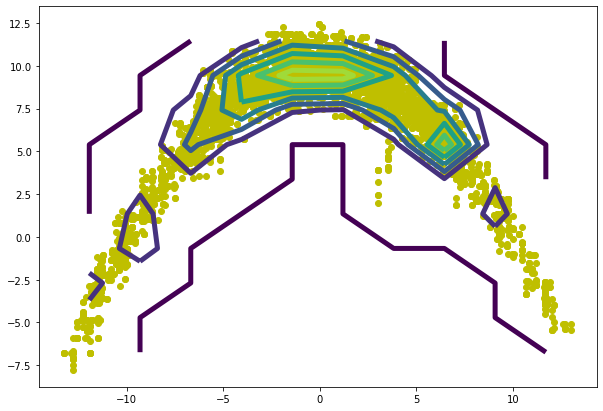

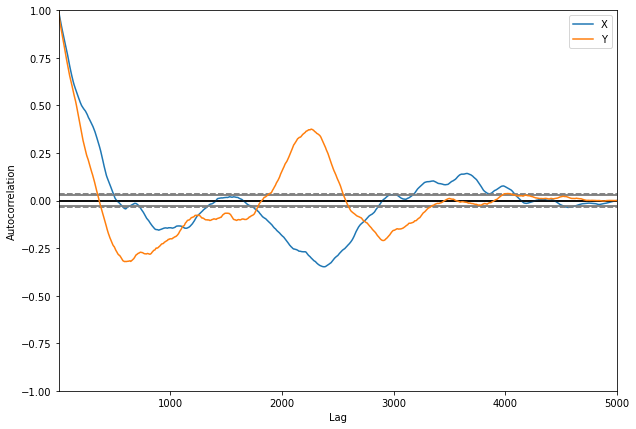

In [ ]:
def adaptive_MH_with_Gibbs_sampler_dimD(maxIter, point0):

    points = []
    points.append(point0)
    d = len(point0)
    l = np.zeros(d)
    batch = 0

    for n in range(1,maxIter):

        B = np.random.randint(d)

        # update the d axis with a new candidate
        candidate = np.random.normal(points[-1][B], np.exp(l[B]))
        old_coord = points[-1].copy()
        new_coord = old_coord.copy()
        new_coord[B] = candidate

        log_ratio_target = np.log(banana_pi_target(np.array(new_coord))) - np.log(banana_pi_target(np.array(old_coord)))
        u = np.random.uniform()
        alpha = min(0, log_ratio_target)

        if n%50==0:
            batch += 1
            delta = min(0.01, batch**(-0.5))
            l[B] = l[B] + delta if alpha > np.log(0.24) else l[B] - delta

        if np.log(u) < alpha:
            points.append(new_coord)
        else:
            points.append(old_coord)

    return points

sampled_points = adaptive_MH_with_Gibbs_sampler_dimD(maxIter = 5000, point0 = [3,2])
X = np.array(sampled_points)[:,0]
Y = np.array(sampled_points)[:,1]
plt.figure( figsize=(10,7) )
H, Xedges, Yedges = np.histogram2d(X, Y)
Xbins = Xedges[:-1] + (Xedges[1] - Xedges[0]) / 2
Ybins = Yedges[:-1] + (Yedges[1] - Yedges[0]) / 2
plt.scatter(X, Y, color="y")
plt.contour(Xbins, Ybins, H.T, linewidths=5)
plt.show()

DF = pds.DataFrame([X,Y]).transpose()
DF.columns = ["X","Y"]
plt.figure( figsize=(10,7) )
pds.plotting.autocorrelation_plot(DF.X, label="X")
pds.plotting.autocorrelation_plot(DF.Y, label="Y")
plt.show()

For both coordinates, x and y the algorithm takes longer to stabilize with the banana shape target, nonetheless looking at the autocorrelation of both with their 4500-lagged version gives good autocorrelation values. (We could have taken a burn-in version over 10000 iterations to not take into account the half first sampled points and get directly good results).

Maybe we expected something better ?

## Exercise 2

### 2.A

#### 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


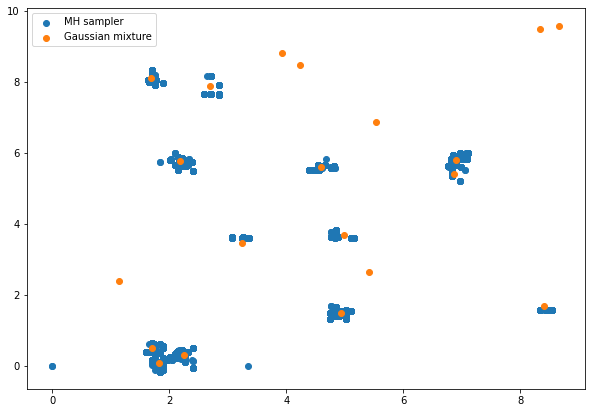

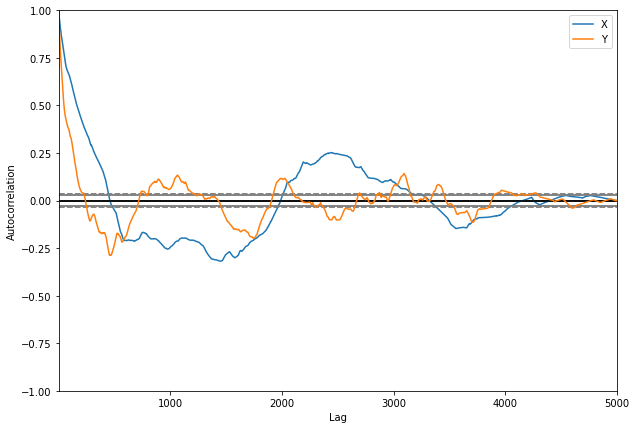

In [ ]:
mu = np.array([[2.18,5.76],
               [8.67,9.59],
               [4.24,8.48],
               [8.41,1.68],
               [3.93,8.82],
               [3.25,3.47],
               [1.70,0.50],
               [4.59,5.60],
               [6.91,5.81],
               [6.87,5.40],
               [5.41,2.65],
               [2.70,7.88],
               [4.98,3.70],
               [1.14,2.39],
               [8.33,9.50],
               [4.93,1.50],
               [1.83,0.09],
               [2.26,0.31],
               [5.54,6.86],
               [1.69,8.11]])

w = np.ones(20)*0.05

sigmas = np.ones(20)*0.1

def target_distribution(X, w, sigmas, mu):
    return sum([ w[i]/(2*pi*sigmas[i]**2) * np.exp( - (X - mu[i]).T.dot(X - mu[i]) / (2*sigmas[i]**2)  ) for i in range(20) ])

def MH_2d(maxIter, point0, w, sigmas, mu):

    points = []
    points.append(point0)
    d = len(point0)

    sampled_points_to_return = points.copy()

    for n in range(1,maxIter):

        for coord in range(d): # update all coordinates
            old = points[-1].copy()
            candidate = np.random.normal(old[coord], 10) # large sigma to explore
            new = old.copy()
            new[coord] = candidate
            log_ratio_target = np.log(target_distribution(new, w, sigmas, mu)) - np.log(target_distribution(old, w, sigmas, mu))
            u = np.random.uniform()
            alpha = min(0, log_ratio_target)
            if np.log(u) < alpha:
                points.append(new)
            else:
                points.append(old)

            sampled_points_to_return.append(points[-1])

    return sampled_points_to_return

plt.figure( figsize=(10,7) )
sampled_points = MH_2d(maxIter = 5000, point0 = [0,0], w = w, sigmas = sigmas, mu = mu)
X = np.array(sampled_points)[:,0]
Y = np.array(sampled_points)[:,1]
plt.scatter(X, Y, label = "MH sampler")
plt.scatter(mu[:,0], mu[:,1], label = "Gaussian mixture")
plt.legend()
plt.show()

DF = pds.DataFrame([X,Y]).transpose()
DF.columns = ["X","Y"]
plt.figure( figsize=(10,7) )
pds.plotting.autocorrelation_plot(DF.X, label="X")
pds.plotting.autocorrelation_plot(DF.Y, label="Y")
plt.show()

On the first graph we can see that our MH sampler is not so bad !

#### 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


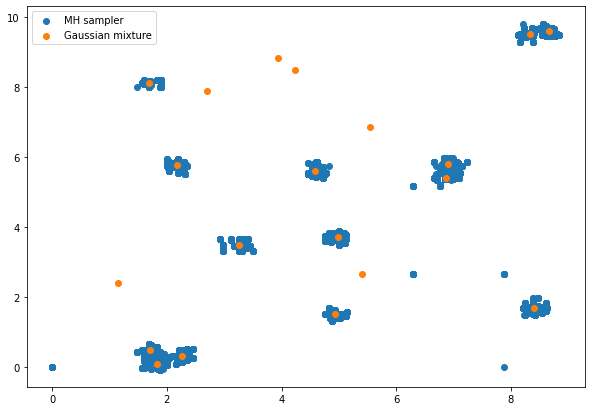

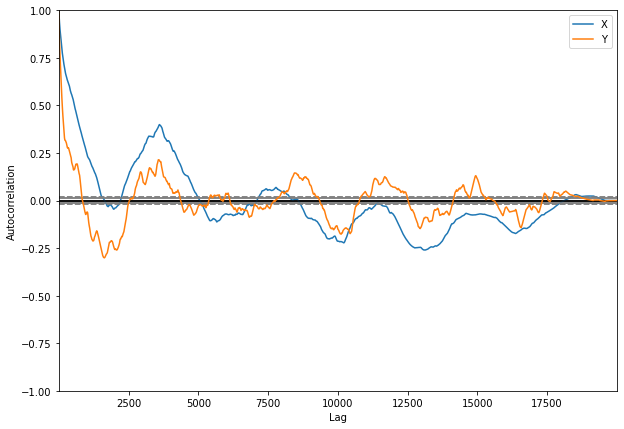

In [ ]:
def target_distribution(X, w, sigmas, mu):
    return sum([ w[i]/(2*pi*sigmas[i]**2) * np.exp( - (X - mu[i]).T.dot(X - mu[i]) / (2*sigmas[i]**2)  ) for i in range(20) ])


def get_alpha_pi_target(new, old, w, sigmas, mu):
    log_ratio_target = np.log(target_distribution(new, w, sigmas, mu)) - np.log(target_distribution(old, w, sigmas, mu))
    return min(0, log_ratio_target)


def adaptive_MH_with_Gibbs_sampler_2d_newversion(maxIter, proba, point0, a):

    points = []
    points.append(point0)
    d = len(point0)
    l = np.zeros(d)
    batch = 0

    for n in range(1,maxIter):

        for coord in range(d): # update all coordinates
            old = points[-1].copy()
            candidate = np.random.normal(old[coord], 10) # large sigma to explore
            new = old.copy()
            new[coord] = candidate

            u = np.random.uniform()
            alpha = get_alpha_pi_target(new, old, w, sigmas, mu)

            if n%50==0:
                batch += 1
                delta = min(0.01, batch**(-0.5))
                l[coord] = l[coord] + delta if alpha > np.log(0.24) else l[coord] - delta

            if np.log(u) < alpha:
                points.append(new)
            else:
                points.append(old)

    return points

plt.figure( figsize=(10,7) )
sampled_points = adaptive_MH_with_Gibbs_sampler_2d_newversion(maxIter = 10000, proba = 0.5, point0 = [0,0], a = 1)
X = np.array(sampled_points)[:,0]
Y = np.array(sampled_points)[:,1]
plt.scatter(X, Y, label = "MH sampler")
plt.scatter(mu[:,0], mu[:,1], label = "Gaussian mixture")
plt.legend()
plt.show()

DF = pds.DataFrame([X,Y]).transpose()
DF.columns = ["X","Y"]
plt.figure( figsize=(10,7) )
pds.plotting.autocorrelation_plot(DF.X, label="X")
pds.plotting.autocorrelation_plot(DF.Y, label="Y")
plt.show()

The adaptive version of the sampler gives better results, however different proportions of points are sampled around the modes so that the sampling is not perfect and does not cover all the modes of the gaussian mixture. As before the first graph shows that our sampler did a good work, nonetheless there is still a high autocorrelation (for previous question and for this one) which mitigates the performance of the algorithm.

### 2.B

#### 1

In [ ]:
def target_distribution(X, w, sigmas, mu):
    return sum([ w[i]/(2*pi*sigmas[i]**2) * np.exp( - (X - mu[i]).T.dot(X - mu[i]) / (2*sigmas[i]**2)  ) for i in range(20) ])


def Parallel_tempering_2d(maxIter, T, w, sigmas, mu):

    K = len(T)
    d = 2
    points = [np.zeros((d,K))]

    for n in range(1,maxIter):

        # Draw the candidate for i in [1,K]

        new_points = np.zeros((d,K))

        for i in range(K):
            old = points[-1][:,i].copy()
            tau = 0.25*sqrt(T[i])
            candidate = np.random.multivariate_normal(old, tau**2 * np.eye(2)) # large sigma to explore
            new = candidate
            log_ratio_target = np.log(target_distribution(new, w, sigmas, mu)) - np.log(target_distribution(old, w, sigmas, mu))
            u = np.random.uniform()
            alpha = min(0, log_ratio_target)
            if np.log(u) < alpha:
                new_points[:, i] = new
            else:
                new_points[:, i] = old

            # Choose the swap indices
            swap_index = np.random.randint(K-1) # we will take swap_index and swap_index + 1

            # Compute swap acceptance proba
            _numerator = target_distribution( new_points[:,swap_index+1], w, sigmas, mu )**(1./T[swap_index]) * target_distribution( new_points[:,swap_index], w, sigmas, mu )**(1./T[swap_index+1])
            _denominator = target_distribution( new_points[:,swap_index], w, sigmas, mu )**(1./T[swap_index]) * target_distribution( new_points[:,swap_index+1], w, sigmas, mu )**(1./T[swap_index+1])

            swap_ratio = _numerator / _denominator

            alpha = min(1, swap_ratio)

            # Eventually swap the chains
            u = np.random.uniform()
            if u < alpha:
                # Swap
                swap_i = new_points[:, swap_index].copy()
                swap_j = new_points[:, swap_index+1].copy()
                new_points[:, swap_index] = swap_j
                new_points[:, swap_index+1] = swap_i

                points.append(new_points)

    return points

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


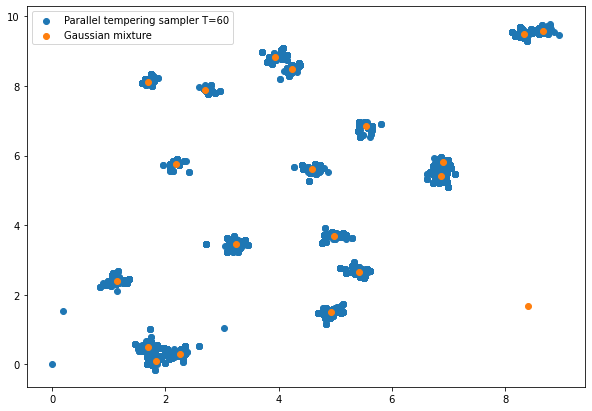

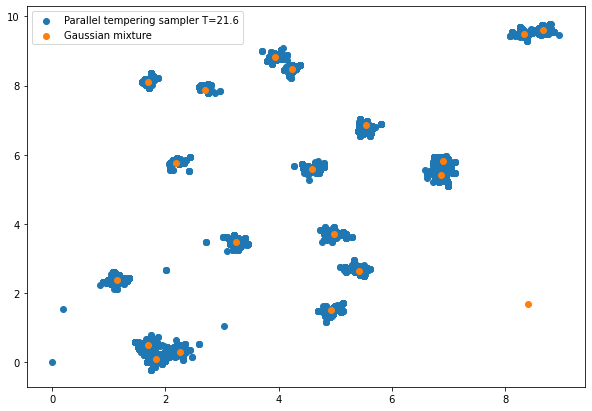

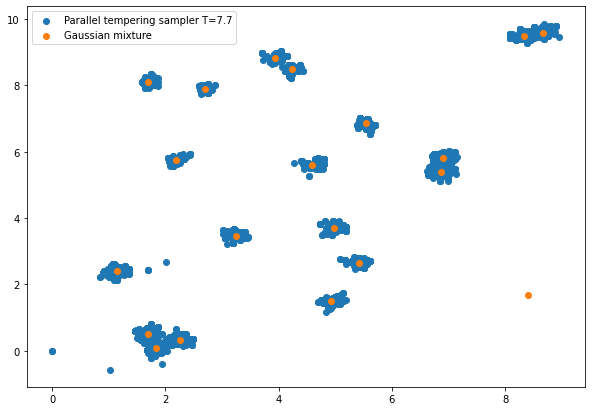

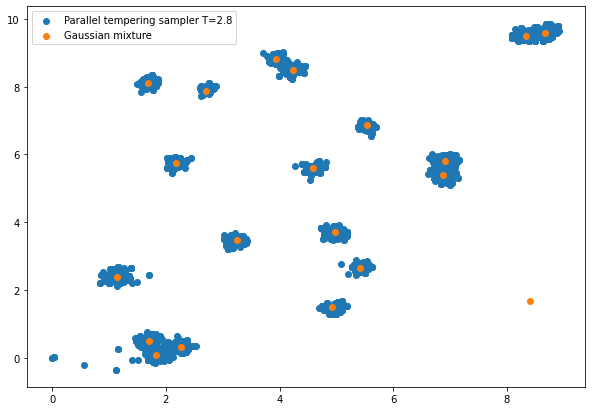

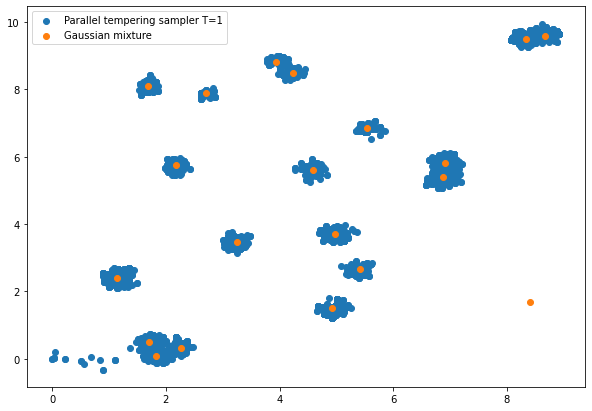

In [ ]:
T = [60, 21.6, 7.7, 2.8, 1]

sampled_points = Parallel_tempering_2d(maxIter = 5000, T = T, w = w, sigmas = sigmas, mu = mu)
  
for temperature in range(len(T)):
    plt.figure( figsize=(10,7) )
    X = np.array(sampled_points)[:, 0, temperature]
    Y = np.array(sampled_points)[:, 1, temperature]
    plt.scatter(X, Y, label = f"Parallel tempering sampler T={T[temperature]}")
    plt.scatter(mu[:,0], mu[:,1], label = "Gaussian mixture")
    plt.legend()
    plt.show()

Cool ! It seems quite good.

## Exercise 3

#### 1

According to the assumptions we have :
$\mathbb{P}(Y|X, \tau) = \mathcal{N}(Y ; X, \tau^2)$, $\mathbb{P}(X|\mu, \sigma) = \mathcal{N}(X ; \mu, \sigma^2)$ and $\mathbb{P}(\varepsilon| \tau) = \mathcal{N}(\varepsilon ; 0, \tau^2)$.

We are looking for the a posteriori distribution, that is to say the distribution of $X$, $\mu$, $\sigma^2$ and $\tau^2$ conditionally on all the rest.

\\

\begin{align*}
\mathbb{P}(X|\mu, \sigma, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y) 
\end{align*}
We will only keep track of elements depending on $X$ here.
\begin{align*}
\mathbb{P}(X|\mu, \sigma, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y)\\
&\propto \mathbb{P}(Y|X, \tau) \mathbb{P}(X|\mu, \sigma)\\
\end{align*}
Also note that the $X_i$ are iid.
\begin{align*}
\mathbb{P}(X|\mu, \sigma, \tau, Y) &= \prod_{i=1}^N \mathbb{P}(X_i|\mu, \sigma, \tau, Y)\\
&\propto \prod_{i=1}^N e^{- \frac{1}{2 \tau^2} \sum_{j} (y_{i,j} - x_i)^2} e^{- \frac{1}{2 \sigma^2} (x_{i} - \mu)^2}\\
&\propto \prod_{i=1}^N e^{- \frac{\sigma^2 \sum_{j} (y_{i,j} - x_i)^2 + \tau^2 (x_{i} - \mu)^2}{2 \tau^2 \sigma^2}}\\
&\propto \prod_{i=1}^N e^{- \frac{\sigma^2 K x_i^2 - 2 x_i \sigma^2 \sum_{j} y_{i,j} + \tau^2 x_i^2 - 2 x_i \tau^2 \mu}{2 \tau^2 \sigma^2}}\\
&\propto \prod_{i=1}^N e^{- \frac{x_i^2 [\sigma^2 K + \tau^2] - 2 x_i [\sigma^2 \sum_{j} y_{i,j} + \tau^2 \mu]}{2 \tau^2 \sigma^2}}\\
&\propto \prod_{i=1}^N e^{- \frac{1}{2 \left( \frac{\tau^2 \sigma^2}{\sigma^2 K + \tau^2} \right)} \left[ x_i^2 - 2 x_i \frac{\sigma^2 \sum_{j} y_{i,j} + \tau^2 \mu}{\sigma^2 K + \tau^2} \right]}\\
& \sim \prod_{i=1}^N \mathcal{N}(\frac{\sigma^2 \sum_{j} y_{i,j} + \tau^2 \mu}{\sigma^2 K + \tau^2}, \frac{\tau^2 \sigma^2}{\sigma^2 K + \tau^2})
\end{align*}

\\

\begin{align*}
\mathbb{P}(\mu|X, \sigma, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y) 
\end{align*}
We will only keep track of elements depending on $\mu$ here.
\begin{align*}
\mathbb{P}(\mu|X, \sigma, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y)\\
&\propto \mathbb{P}(\mu|X, \sigma)\\
&\propto e^{- \frac{1}{2 \sigma^2} \sum_{i} (x_{i} - \mu)^2}\\
&\propto e^{- \frac{1}{2 \sigma^2} \sum_{i} x_{i}^2 + \mu^2 - 2 x_i \mu}\\
&\propto e^{- \frac{N}{2 \sigma^2} (\bar{x} + \mu^2 - 2 \bar{x} \mu)}\\
&\propto e^{- \frac{1}{2 (\frac{\sigma^2}{N})}(\bar{x} - \mu)^2}\\
& \sim \mathcal{N}(\bar{x}, \frac{\sigma^2}{N})
\end{align*}

\\

\begin{align*}
\mathbb{P}(\sigma|X, \mu, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y) 
\end{align*}
We will only keep track of elements depending on $\sigma$ here.
\begin{align*}
\mathbb{P}(\sigma|X, \mu, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y)\\
&\propto \mathbb{P}(X|\mu, \sigma) \pi_{prior}(\sigma,\tau)\\
&\propto \frac{1}{\sigma^N} e^{- \frac{1}{2 \sigma^2} \sum_{i} (x_{i} - \mu)^2} \frac{1}{\sigma^{2(1+ \alpha)}} e^{- \frac{\beta}{\sigma^2}}\\
&\propto \frac{1}{\sigma^N} e^{- \frac{1}{2 (\frac{\sigma^2}{N})} (\bar{x} - \mu)^2} \frac{1}{\sigma^{2(1+ \alpha)}} e^{- \frac{\beta}{\sigma^2}}\\
&\propto \frac{1}{ {\sigma^2}^{ \{1+\frac{N}{2}+\alpha\}} } e^{- \frac{ \frac{N}{2}(\bar{x} - \mu)^2 + \beta }{\sigma^2} }\\
&\propto \Gamma^{-1}\left(\frac{N}{2}+\alpha, \frac{N}{2} (\bar{x} - \mu)^2 + \beta \right)\\
\end{align*}

\\

\begin{align*}
\mathbb{P}(\tau|X, \mu, \sigma, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y) 
\end{align*}
We will only keep track of elements depending on $\tau$ here.
\begin{align*}
\mathbb{P}(\tau|X, \mu, \sigma, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y)\\
&\propto \mathbb{P}(Y|X, \tau) \pi_{prior}(\sigma,\tau)\\
&\propto \frac{1}{\tau^K} e^{- \frac{1}{2 \tau^2} \sum_{i,j} (y_{i,j} - x_i)^2} \frac{1}{\tau^{2(1+ \gamma)}} e^{- \frac{\beta}{\tau^2}}\\
&\propto \frac{1}{ {\tau^2}^{ \{1+\frac{K}{2}+\gamma\}} } e^{- \frac{ \frac{1}{2} \sum_{i,j}(y_{i,j} - x_i)^2 + \beta}{\tau^2} }\\
&\propto \Gamma^{-1}\left(\frac{K}{2}+\gamma, \frac{1}{2} \sum_{i,j}(y_{i,j} - x_i)^2 + \beta \right)\\
\end{align*}

#### 2

In [ ]:
def Gibbs_sampler(Y, alpha, beta, gamma, maxIter):

    sampled_points = []
    N,K = Y.shape

    X = np.random.normal( 0, 1, N )
    sum_y_x = np.sum( np.sum( np.array([(Y[:,j] - X)**2 for j in range(K)]), axis = 1 ) )
    mu = np.random.normal( np.mean(X), 1/N )
    sigma_2 = scipy.stats.invgamma( N/2 + alpha, N*(np.mean(X)-mu)**2/2 + beta ).rvs()
    tau_2 = scipy.stats.invgamma( K/2 + gamma, sum_y_x/2 + beta ).rvs()

    for _ in range(maxIter):

        sum_y = np.sum( np.sum( Y, axis = 1 ) )
        X = np.random.normal( (sigma_2 * sum_y + tau_2 * mu)/(sigma_2 * K + tau_2) , (tau_2 * sigma_2)/(sigma_2 * K + tau_2) , N )
        sum_y_x = np.sum( np.sum( np.array([(Y[:,j] - X)**2 for j in range(K)]), axis = 1 ) )
        sigma_2 = scipy.stats.invgamma( N/2 + alpha, N*(np.mean(X)-mu)**2/2 + beta ).rvs()
        mu = np.random.normal( np.mean(X), sigma_2/N )
        tau_2 = scipy.stats.invgamma( K/2 + gamma, sum_y_x/2 + beta ).rvs()

        sampled_points.append( [sigma_2, tau_2, mu, X] )

    return sampled_points

#### 3

SOLUTION 1:

\begin{align*}
\mathbb{P}(X, \mu | \sigma, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y)\\
&\propto \mathbb{P}(X|Y, \tau, \sigma) \mathbb{P}(\mu|X, \sigma)\\
&\propto \prod_{i=1}^N e^{- \frac{1}{2 \tau^2} \sum_{j} (y_{i,j} - x_i)^2} e^{- \frac{1}{2 \sigma^2} (x_{i} - \mu)^2}\\
&\propto \prod_{i=1}^N e^{- \frac{1}{2 \tau^2 \sigma^2} \left[ \sigma^2 (\sum_{j} y_{i,j}^2 + Kx_i^2 - 2 x_i \sum_{j} y_{i,j}) + \tau^2 (x_i^2 + \mu^2 - 2 \mu x_i) \right]}\\
\end{align*}

Then for a fixed $i$:
\begin{align*}
\mathbb{P}(X_i, \mu | \sigma, \tau, Y) &\propto e^{- \frac{1}{2 \tau^2 \sigma^2} \left[ \sigma^2 (\sum_{j} y_{i,j}^2 + Kx_i^2 - 2 x_i \sum_{j} y_{i,j}) + \tau^2 (x_i^2 + \mu^2 - 2 \mu x_i) \right]}\\
&\propto e^{- \frac{1}{2 \tau^2 \sigma^2} \left[ x_i^2 (\sigma^2 K + \tau^2) + \mu^2 (\tau^2) + xi (- 2 \sigma^2 \sum_j y_{i,j}) + \mu (0) + x_i \mu (- 2 \tau^2) + (\sigma^2 \sum_j y_{i,j}^2) \right]}\\
\end{align*}

We will now look for $Μ$ and $\Sigma$ such that :
\begin{align*}
\mathbb{P}(X_i, \mu | \sigma, \tau, Y) &\propto e^{- \frac{1}{2} \: \: \left( \begin{bmatrix} x_i \\ \mu \\ \end{bmatrix} - M \right)^T \: \: \Sigma^{-1} \: \: \left( \begin{bmatrix} x_i \\ \mu \\ \end{bmatrix} - M \right)}\\
\end{align*}

Where $\Sigma^{-1} = \begin{bmatrix} a & c \\ c & d \\ \end{bmatrix}$ and $M = \begin{bmatrix} m \\ n \\ \end{bmatrix}$.

\begin{align*}
\mathbb{P}(X_i, \mu | \sigma, \tau, Y) &\propto e^{- \frac{1}{2} \: \: \left( \begin{bmatrix} x_i \\ \mu \\ \end{bmatrix} - \begin{bmatrix} m \\ n \\ \end{bmatrix} \right)^T \: \: \begin{bmatrix} a & c \\ c & d \\ \end{bmatrix} \: \: \left( \begin{bmatrix} x_i \\ \mu \\ \end{bmatrix} - \begin{bmatrix} m \\ n \\ \end{bmatrix} \right)}\\
&\propto e^{- \frac{1}{2} \: \: \left( x_i^2 a + \mu^2 d + x_i(-2am-2cn) + \mu(-2cm-2dn) + \mu x_i (2c) + (2cnm + n^2d + m^2a) \right)}\\
\end{align*}

Then we clearly identify:
- $a = \frac{\sigma^2 K + \tau^2}{\tau^2 \sigma^2}$
- $d = \frac{1}{\sigma^2}$
- $c = - \frac{1}{\sigma^2} = - d$

We need to solve:

\begin{align*}
&\left\{
    \begin{array}{l}
        cm + dn = 0 \\
        am + cn = \frac{\sum_j y_{i,j}}{\tau^2} \\
        2 n c m + n^2 d + m^2 a = \frac{\sum_j y_{i,j}^2}{\tau^2} \\
    \end{array}
\right.\\\\
\iff& \left\{
    \begin{array}{l}
        d(n-m)=0 \\
        am - dn = \frac{\sum_j y_{i,j}}{\tau^2} \\
        - 2 n d m + n^2 d + m^2 a = \frac{\sum_j y_{i,j}^2}{\tau^2} \\
    \end{array}
\right.\\\\
\iff& \left\{
    \begin{array}{l}
        n = m \\
        m \left(\frac{K}{\tau^2}\right) = \frac{\sum_j y_{i,j}}{\tau^2} \\
        m^2 = \frac{\tau^2}{K} \frac{\sum_j y_{i,j}^2}{\tau^2} \\
    \end{array}
\right.\\\\
\iff& \left\{
    \begin{array}{l}
        n = m \\
        m = \frac{\sum_j y_{i,j}}{K} \\
        m^2 = \frac{\sum_j y_{i,j}^2}{K} \\
    \end{array}
\right.\\\\
\iff& \left\{
    \begin{array}{l}
        n = m = \frac{\sum_j y_{i,j}^2}{\sum_j y_{i,j}} \\
    \end{array}
\right.
\end{align*}

In the end we can write that $\forall \: i$:

\begin{align*}
\mathbb{P}(X_i, \mu | \sigma, \tau, Y) \sim \mathcal{N} \left( \begin{bmatrix} \frac{\sum_j y_{i,j}^2}{\sum_j y_{i,j}} \\ \frac{\sum_j y_{i,j}^2}{\sum_j y_{i,j}} \\ \end{bmatrix}, \begin{bmatrix} \frac{\sigma^2 K + \tau^2}{\tau^2 \sigma^2} & - \frac{1}{\sigma^2} \\ - \frac{1}{\sigma^2} & \frac{1}{\sigma^2} \\ \end{bmatrix}^{-1} \right)
\end{align*}

ISSUES WITH THIS SOLUTION:
- The multivariate gaussian depend on $i$ (especially the mean)
- How to generalize this definition for all $X_i$ ?
- We can easily create the cov matrix but then there is a problem for the mu mean since it depends on $i$
- There is probably an error but I cannot find it.

SOLUTION 2:

\begin{align*}
\mathbb{P}(X, \mu | \sigma, \tau, Y) &\propto \mathbb{P}(X,\mu, \sigma, \tau, Y)\\
&\propto \mathbb{P}(X|Y, \tau, \sigma) \mathbb{P}(\mu|X, \sigma)\\
&\propto \prod_{i=1}^N \int_{\mathbb{R}} e^{- \frac{1}{2 \tau^2} \sum_{j} (y_{i,j} - x_i)^2} e^{- \frac{1}{2 \sigma^2} (x_{i} - \mu)^2} \: d\mu\: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N \int_{\mathbb{R}} e^{- \frac{\sigma^2 \sum_{j} (y_{i,j} - x_i)^2 + \tau^2 (x_{i} - \mu)^2}{2 \tau^2 \sigma^2}} \: d\mu \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N \int_{\mathbb{R}} e^{- \frac{\sigma^2 K x_i^2 - 2 x_i \sigma^2 \sum_{j} y_{i,j} + \tau^2 x_i^2 - 2 x_i \tau^2 \mu}{2 \tau^2 \sigma^2}} \: d\mu \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N \int_{\mathbb{R}} e^{- \frac{\sigma^2 K x_i^2 - 2 x_i \sigma^2 \sum_{j} y_{i,j} + \tau^2 x_i^2}{2 \tau^2 \sigma^2}} e^{-\frac{- 2 x_i \tau^2 \mu}{2 \tau^2 \sigma^2}} \: d\mu \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N e^{- \frac{\sigma^2 K x_i^2 - 2 x_i \sigma^2 \sum_{j} y_{i,j} + \tau^2 x_i^2}{2 \tau^2 \sigma^2}} \int_{\mathbb{R}} e^{-\frac{- 2 x_i \tau^2 \mu}{2 \tau^2 \sigma^2}} \: d\mu \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N e^{- \frac{\sigma^2 K x_i^2 - 2 x_i \sigma^2 \sum_{j} y_{i,j} + \tau^2 x_i^2}{2 \tau^2 \sigma^2}} \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N e^{- \frac{(\sigma^2 K + \tau^2) x_i^2 - 2 x_i \sigma^2 \sum_{j} y_{i,j}}{2 \tau^2 \sigma^2}} \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
&\propto \prod_{i=1}^N \mathcal{N}\left(\frac{\sigma^2 \sum_{j} y_{i,j}}{\sigma^2 K + \tau^2}, \frac{\sigma^2 \tau^2}{\sigma^2 K + \tau^2}\right) \: \: \mathcal{N}\left(\bar{x}, \frac{\sigma^2}{N}\right)\\
\end{align*}

ISSUES WITH THIS SOLUTION:
- We cannot sample X and mu in the same time with this definition since mu depends on X
- With this definition the code would be almost the same as the simple Gibbs sampler (except that previously the mean of X did depend on mu).

In [ ]:
def Blocks_Gibbs_sampler(Y, alpha, beta, gamma, maxIter):

    sampled_points = []
    N,K = Y.shape

    X = np.random.normal( 0, 1, N )
    sum_y_x = np.sum( np.sum( np.array([(Y[:,j] - X)**2 for j in range(K)]), axis = 1 ) )
    mu = np.random.normal( np.mean(X), 1/N )
    sigma_2 = scipy.stats.invgamma( N/2 + alpha, N*(np.mean(X)-mu)**2/2 + beta ).rvs()
    tau_2 = scipy.stats.invgamma( K/2 + gamma, sum_y_x/2 + beta ).rvs()

    for _ in range(maxIter):

        sum_y = np.sum( np.sum( Y, axis = 1 ) )

        #
        # sample X and mu from a multivariate gaussian
        #

        sum_y_x = np.sum( np.sum( np.array([(Y[:,j] - X)**2 for j in range(K)]), axis = 1 ) )
        sigma_2 = scipy.stats.invgamma( N/2 + alpha, N*(np.mean(X)-mu)**2/2 + beta ).rvs()
        tau_2 = scipy.stats.invgamma( K/2 + gamma, sum_y_x/2 + beta ).rvs()

        sampled_points.append( [sigma_2, tau_2, mu, X] )

    return sampled_points

#### 4

Gibbs versus Block-Gibbs:
Theoretically, the block-gibbs should be more efficient in terms of convergence since it is faster than a simple Gibbs sampler. However, each iteration is then slower with a Block-Gibbs sampler.

#### 5

... I don't know what to show.